In [19]:
#https://analyticsindiamag.com/complete-tutorial-on-tkinter-to-deploy-machine-learning-model/


In [39]:
#https://analyticsindiamag.com/how-to-implement-cnn-model-to-count-fingers-and-distinguish-between-left-and-right-hand/
!pip install Kaggle

In [1]:
!nvidia-smi

Tue Sep 15 08:14:26 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [6]:
import tensorflow as tf
from zipfile import ZipFile
import os, sys
import random
import warnings
import matplotlib.pyplot as plt


from scipy import ndarray

import skimage as sk
from skimage import transform
from skimage import util
from skimage import io
from skimage.io import imread
from skimage.transform import resize

from sklearn import metrics

from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import numpy as np
from numpy import asarray

from keras.models import Sequential
from keras.layers import Convolution2D,Dropout,Dense,BatchNormalization,MaxPooling2D,Flatten
from keras.optimizers import Adam, SGD
from keras.layers import LeakyReLU


Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [7]:
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json 

Saving kaggle.json to kaggle.json


In [8]:
!kaggle datasets download -d koryakinp/fingers

 97% 353M/363M [00:15<00:00, 22.8MB/s]
100% 363M/363M [00:15<00:00, 25.0MB/s]


In [9]:
from zipfile import ZipFile
file_name = "fingers.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [11]:
import cv2
X_train=[]
y_train=[]
os.chdir('/content/train')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)   
      img = cv2.resize(img,(128,128))
      X_train.append(img)
      y_train.append(i[-6:-4]) 

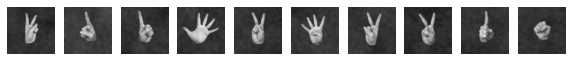

label for each of the above image: ['2L', '1R', '1L', '5L', '2R', '4R', '2R', '2R', '1R', '0R']


In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

In [20]:
X_test = []
y_test = []
os.chdir('/content/test')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)   
      img = cv2.resize(img,(128,128))
      X_test.append(img)
      y_test.append(i[-6:-5]) 

In [21]:
print ("Shape of an image in X_train: ", X_train[0].shape)
print ("Shape of an image in X_test: ", X_test[0].shape)
print("Total categories: ", len(np.unique(y_train)))
print("Total categories: ", len(np.unique(y_test)))

Shape of an image in X_train:  (128, 128, 3)
Shape of an image in X_test:  (128, 128, 3)
Total categories:  12
Total categories:  6


In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

y_train = tf.keras.utils.to_categorical(y_train, num_classes=12)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=6)


y_train = np.array(y_train)
X_train = np.array(X_train)

y_test = np.array(y_test)
X_test = np.array(X_test)

In [24]:
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)

X_train Shape:  (18000, 128, 128, 3)
X_test Shape:  (3600, 128, 128, 3)
y_train Shape:  (18000, 12)
y_test Shape:  (3600, 6)


In [29]:
m1=Sequential()
m1.add(BatchNormalization(input_shape = (128,128,3)))
m1.add(Convolution2D(32, (3,3), activation ='relu', input_shape = (128, 128, 3))) 
m1.add(MaxPooling2D(pool_size=2))
m1.add(Convolution2D(filters=6,kernel_size=4,padding='same',activation='relu'))
m1.add(MaxPooling2D(pool_size=2))
m1.add(Convolution2D(filters=128,kernel_size=3,padding='same',activation='relu'))
m1.add(MaxPooling2D(pool_size=2))
m1.add(Convolution2D(filters=128,kernel_size=2,padding='same',activation='relu'))
m1.add(MaxPooling2D(pool_size=2))
m1.add(Flatten()) 
m1.add(Dense(units=128,activation = 'relu'))
m1.add(Dense(units = 64, activation = 'relu'))
m1.add(Dense(units = 32, activation = 'relu'))
m1.add(Dense(units = 12, activation = 'softmax'))


In [30]:
m1.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [31]:
model = m1.fit(X_train,y_train,
                    epochs=30, 
                    validation_data=(X_test,y_test),
                    verbose = 1,
                    initial_epoch=0)

Epoch 1/30
563/563 [==============================] - ETA: 0s - loss: 0.1160 - accuracy: 0.9611

ValueError: ignored

In [ ]:
loss_and_metrics = m1.evaluate(X_test,y_test)
print(loss_and_metrics)

In [ ]:
predicted_classes = m1.predict(X_train[:,:,:,:])
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
predicted_classes[0]

In [32]:
import numpy as np
k=X_train.shape[0]
r=np.random.randint(k)
r


13628

In [ ]:
print("Prediction:",predicted_classes[r])
print("\nActuals:   ",y_train[r])


In [ ]:

k=X_train.shape[0]
r=np.random.randint(k)
r

print("Prediction:",predicted_classes[r])
print("\nActuals:   ",y_train[r])